In [15]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import itertools

In [16]:
#Function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='YlOrRd'):
      
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(20,10),)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

In [17]:
#importing dataset
data="E:\snu\SEM 6\APPLIED ML\PROJECT\EED363_1710110400_YATHARTH\Data\clean_data.csv"
clean_data=pd.read_csv(data)
clean_data = clean_data.drop(['Unnamed','Unnamed: 0','Unnamed: 0.1'], axis=1)
X=clean_data.iloc[:,5:11]
Y=clean_data.iloc[:,0]
activities=["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]

In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [19]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=421200/1280900,random_state=0)

In [20]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#predicting training set results and thus finding accuracy
y_pred_train=classifier.predict(X_train)

<Figure size 432x288 with 0 Axes>

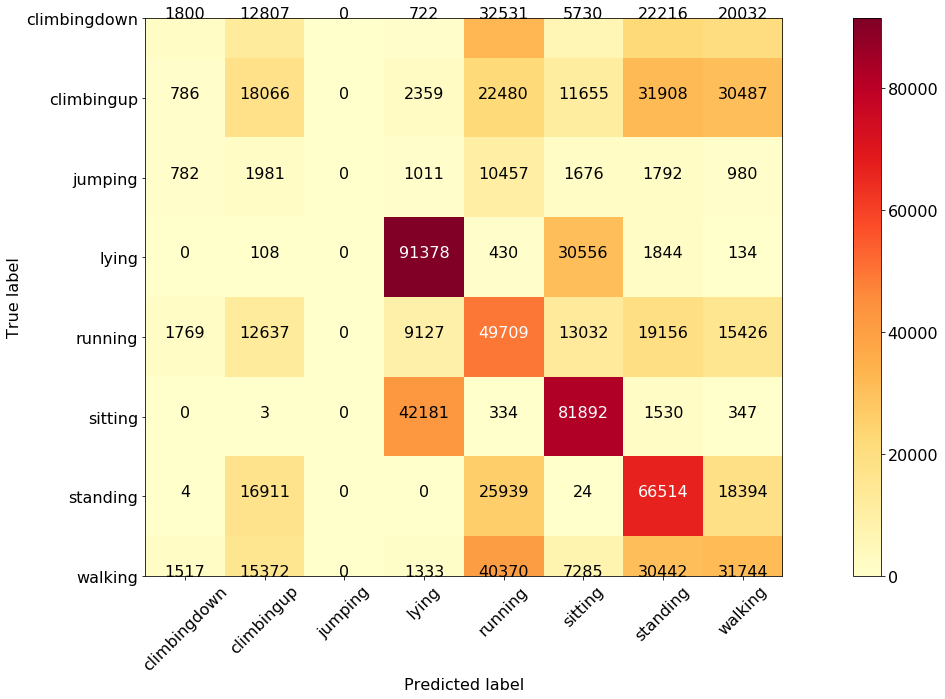

In [22]:
#Making confusion matrix
cm_train=confusion_matrix(Y_train,y_pred_train)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_train, 
                      classes=activities,
                      title='');

In [23]:
print(classification_report(Y_train, y_pred_train))
print(f'Training acc score is: {accuracy_score(Y_train,y_pred_train)*100:.3f}')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.27      0.02      0.04     95838
           1       0.23      0.15      0.18    117741
           2       0.00      0.00      0.00     18679
           3       0.62      0.73      0.67    124450
           4       0.27      0.41      0.33    120856
           5       0.54      0.65      0.59    126287
           6       0.38      0.52      0.44    127786
           7       0.27      0.25      0.26    128063

    accuracy                           0.40    859700
   macro avg       0.32      0.34      0.31    859700
weighted avg       0.37      0.40      0.36    859700

Training acc score is: 39.677


In [24]:
#predicting test set results and thus finding accuracy
y_pred_test=classifier.predict(X_test) 

<Figure size 432x288 with 0 Axes>

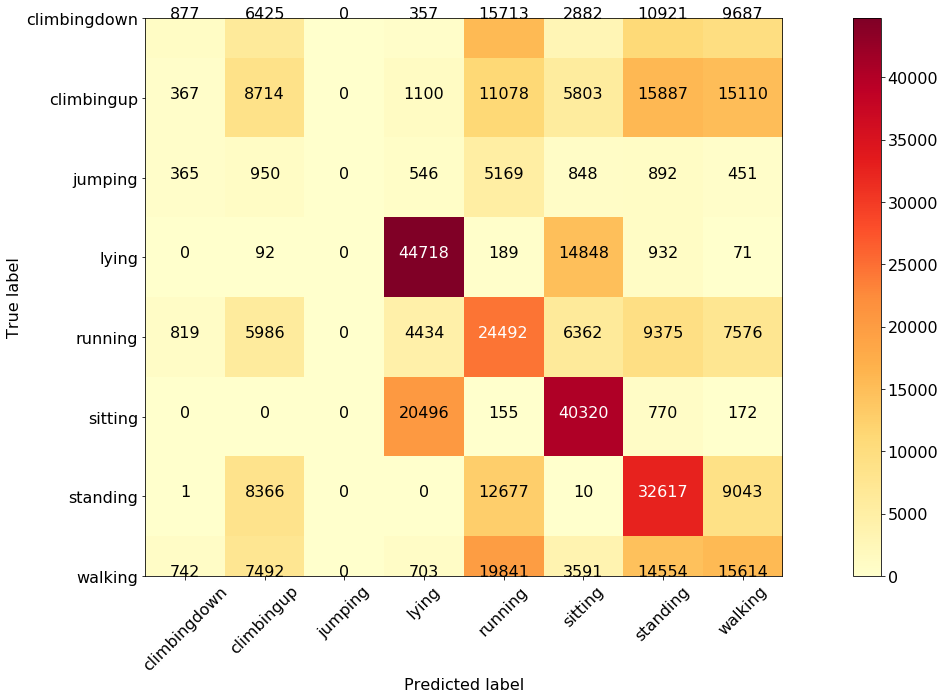

In [25]:
#Making Confusion Matrix
cm_test=confusion_matrix(Y_test,y_pred_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_test, 
                      classes=activities,
                      title='');

In [26]:
print(classification_report(Y_test, y_pred_test))
print(f'Test acc score is: {accuracy_score(Y_test,y_pred_test)*100:.3f}')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.28      0.02      0.04     46862
           1       0.23      0.15      0.18     58059
           2       0.00      0.00      0.00      9221
           3       0.62      0.73      0.67     60850
           4       0.27      0.41      0.33     59044
           5       0.54      0.65      0.59     61913
           6       0.38      0.52      0.44     62714
           7       0.27      0.25      0.26     62537

    accuracy                           0.40    421200
   macro avg       0.32      0.34      0.31    421200
weighted avg       0.37      0.40      0.36    421200

Test acc score is: 39.732
